# Assignments for "Assumptions of Linear Regression"

To close out this lesson, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit a link to a single Gist file that contains links to the two notebooks.

## 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from Kaggle.
- Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing* and *pressure*. Estimate the model using OLS.
- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
Y = df["Temperature (C)"] 
X = df[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]

In [6]:
X

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,0.89,14.1197,251.0,1015.13
1,0.86,14.2646,259.0,1015.63
2,0.89,3.9284,204.0,1015.94
3,0.83,14.1036,269.0,1016.41
4,0.83,11.0446,259.0,1016.51
...,...,...,...,...
96448,0.43,10.9963,31.0,1014.36
96449,0.48,10.0947,20.0,1015.16
96450,0.56,8.9838,30.0,1015.66
96451,0.60,10.5294,20.0,1015.95


In [7]:
lrm=linear_model.LinearRegression()
lrm.fit(X,Y)

LinearRegression()

In [8]:
print("Coefficients: ",lrm.coef_)
print("Bias: ",lrm.intercept_)

Coefficients:  [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Bias:  37.92643818528525


In [9]:
# Y =  37.93 + (-3.25)*x1 + (-2.01)*x2 + (4.05)*x3 + (-6.92)*x4 

In [10]:
from sklearn import linear_model
import statsmodels.api as sm
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:27:20   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1 - Assumption one: linearity of the model in the coefficients

In [11]:
df_sq_X =df[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]
df_sq_X

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,0.89,14.1197,251.0,1015.13
1,0.86,14.2646,259.0,1015.63
2,0.89,3.9284,204.0,1015.94
3,0.83,14.1036,269.0,1016.41
4,0.83,11.0446,259.0,1016.51
...,...,...,...,...
96448,0.43,10.9963,31.0,1014.36
96449,0.48,10.0947,20.0,1015.16
96450,0.56,8.9838,30.0,1015.66
96451,0.60,10.5294,20.0,1015.95


In [12]:
for i in df_sq_X:
    df_sq_X[i]= df_sq_X[i]*df_sq_X[i]
    
df_sq_X    

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,0.7921,199.365928,63001.0,1.030489e+06
1,0.7396,203.478813,67081.0,1.031504e+06
2,0.7921,15.432327,41616.0,1.032134e+06
3,0.6889,198.911533,72361.0,1.033089e+06
4,0.6889,121.983189,67081.0,1.033293e+06
...,...,...,...,...
96448,0.1849,120.918614,961.0,1.028926e+06
96449,0.2304,101.902968,400.0,1.030550e+06
96450,0.3136,80.708662,900.0,1.031565e+06
96451,0.3600,110.868264,400.0,1.032154e+06


In [13]:
df_Y = df["Temperature (C)"] 

In [14]:
gaus_m = linear_model.LinearRegression()
gaus_m.fit(df_sq_X,df_Y)

LinearRegression()

Coefficents : [-2.35248895e+01 -6.58500323e-03  1.08921904e-05 -2.25994406e-06]
Intercept  :  28.41806643703073


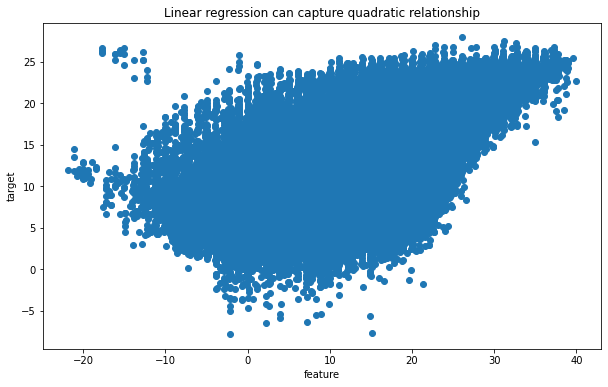

In [15]:
predictions = gaus_m.predict(df_sq_X)

print("Coefficents : {}".format(gaus_m.coef_))
print("Intercept  :  {}".format(gaus_m.intercept_))

plt.figure(figsize =(10,6))
plt.scatter(df_Y , predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

### 2 - Assumption two: the error term should be zero on average

In [16]:
X = df[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]
Y = df["Temperature (C)"] 
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is : {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is : 2.018151173889441e-15


### 3- Assumption three: homoscedasticity

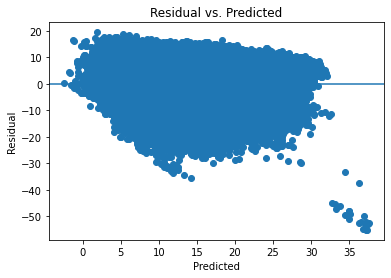

In [17]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [18]:
from scipy.stats import bartlett
from scipy.stats import levene


bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


### 4- Assumption four: low multicollinearity

In [19]:
import matplotlib.pyplot as plt

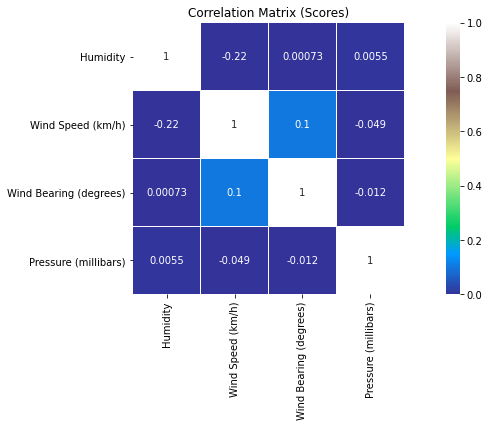

In [20]:
plt.figure(figsize=(15,5))
corr_ = df[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]].corr()
sns.heatmap(corr_, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='terrain')
plt.title("Correlation Matrix (Scores)")
plt.show()

### 5- Assumption five: error terms should be uncorrelated with one other

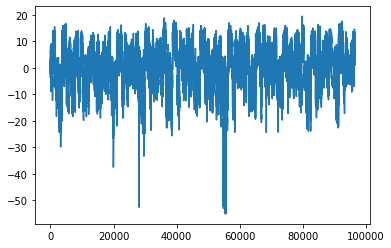

In [21]:
plt.plot(errors)
plt.show()

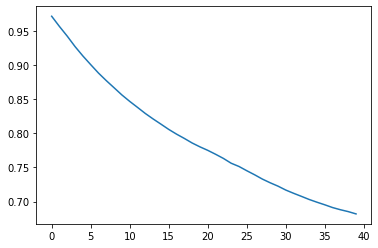

In [22]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

### 6- Assumption six: features shouldn't be correlated with the errors

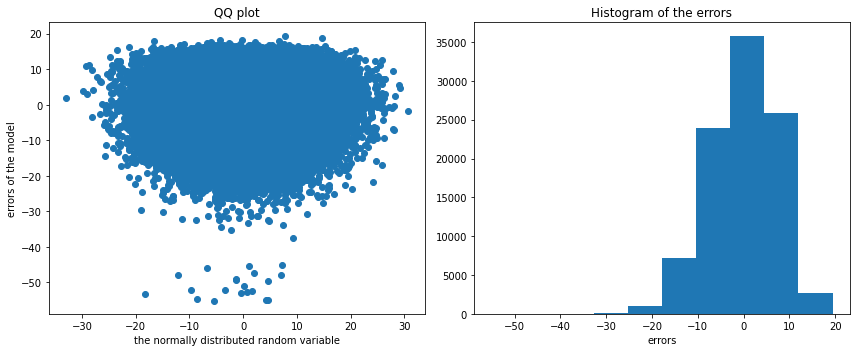

In [23]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.2967352523306 and p value is 0.0
Normality test statistics is 3375.432307699559 and p value is 0.0


## 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle. 
- Reimplement the model you built in the previous lesson. 
- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

In [25]:
train = pd.read_csv("train_new.csv")
train

,Unnamed: 0,Id,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,0,1,7,2003,2003,856,856,1710,2,8,2,548,208500
1,1,2,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,2,3,7,2001,2002,920,920,1786,2,6,2,608,223500
3,3,4,7,1925,1970,756,961,1717,1,7,3,642,140000
4,4,5,8,2000,2000,1145,1145,2158,2,9,3,757,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,1456,1457,6,1978,1988,1542,1680,2073,2,7,2,500,210000
1457,1457,1458,7,1941,2006,1152,1188,2158,2,9,1,252,266500
1458,1458,1459,5,1950,1996,1078,1078,1078,1,5,1,240,142125


In [26]:
from sklearn import linear_model
X = train[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]]
Y = train.SalePrice

lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

print("Coefficents : {}".format(lrm.coef_))
print("\nIntercept : {}".format(lrm.intercept_))


import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

Coefficents : [ 2.77608061e+04  7.61044146e+01  3.10597000e+02  4.70351490e+01
  5.82681878e+00  4.56584059e+01 -4.61303920e+03  2.11334319e+03
  8.15296445e+03  2.30260116e+01]

Intercept : -913017.4161691939


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     481.0
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:27:30   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -9.13e+05   1.31e+05     -6.962      0.000   -1.17e+06   -6.56e+05
OverallQual   2.776e+04   1326.618     20.926      0.000    2.52e+04    3.04e+04
YearBuilt       76.1044     58.448      1.302      0.193     -38.547     190.756
YearRemodAdd   310.5970     65.443      4.746      0.000     182.224     438.970
TotalBsmtSF     47.0351      6.886      6.831      0.000      33.528      60.542
1stFlrSF         5.8268      6.717      0.868      0.386      -7.348      19.002
GrLivArea       45.6584      5.226      8.736      0.000      35.407      55.910
FullBath     -4613.0392   2695.451     -1.711      0.087   -9900.443     674.364
TotRmsAbvGrd  2113.3432   1275.888      1.656      0.098    -389.443    4616.129
GarageCars    8152.9644   3366.689      2.422      0.016    1548.859    1.48e+04
GarageArea      23.0260     12.497      1.843      0.066      -1.488      47.540
==============================================================================
Omnibus:                      880.601   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25972.227
Skew:                           2.285   Prob(JB):                         0.00
Kurtosis:                      23.151   Cond. No.                     4.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1 - Assumption one: linearity of the model in the coefficients

In [27]:
train_sq_X =train[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]]
for i in train_sq_X:
    train_sq_X[i]= train_sq_X[i]*train_sq_X[i]
    
train_sq_X  

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,49,4012009,4012009,732736,732736,2924100,4,64,4,300304
1,36,3904576,3904576,1592644,1592644,1592644,4,36,4,211600
2,49,4004001,4008004,846400,846400,3189796,4,36,4,369664
3,49,3705625,3880900,571536,923521,2948089,1,49,9,412164
4,64,4000000,4000000,1311025,1311025,4656964,4,81,9,573049
...,...,...,...,...,...,...,...,...,...,...
1455,36,3996001,4000000,908209,908209,2712609,4,49,4,211600
1456,36,3912484,3952144,2377764,2822400,4297329,4,49,4,250000
1457,49,3767481,4024036,1327104,1411344,4656964,4,81,1,63504
1458,25,3802500,3984016,1162084,1162084,1162084,1,25,1,57600


In [28]:
train_Y = train["SalePrice"] 
gaus_m2 = linear_model.LinearRegression()
gaus_m2.fit(train_sq_X,train_Y)

LinearRegression()

Coefficents : [1.96666554e+03 2.39697855e-02 7.08015619e-02 1.98152237e-02
 1.50331651e-03 1.73694670e-02 1.98276708e+01 1.13834791e+01
 3.39302058e+03 2.07571006e-02]
Intercept  :  -354997.3229646713


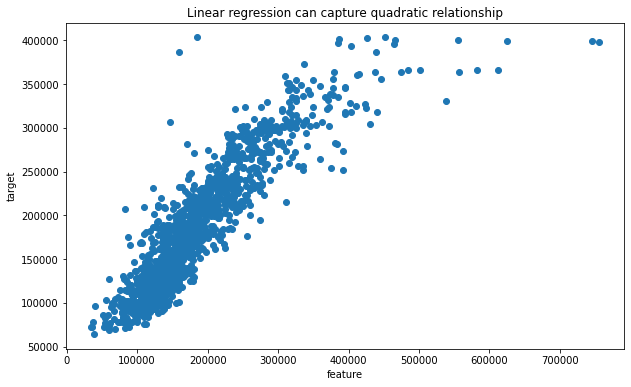

In [29]:
predictions2 = gaus_m2.predict(train_sq_X)

print("Coefficents : {}".format(gaus_m2.coef_))
print("Intercept  :  {}".format(gaus_m2.intercept_))

plt.figure(figsize =(10,6))
plt.scatter(train_Y , predictions2)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

### 2 - Assumption two: the error term should be zero on average

In [30]:
train_sq_X =train[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]]
train_Y = train["SalePrice"] 
predictions2 = lrm.predict(train_sq_X)
errors = train_Y - predictions2

print("Mean of the errors in the medical costs model is : {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is : -7.838100092868282e-11


### 3- Assumption three: homoscedasticity

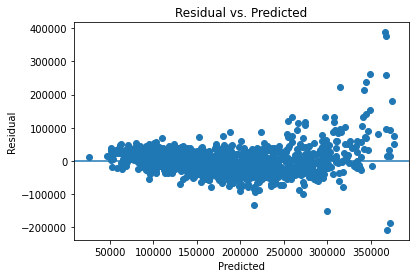

In [31]:
plt.scatter(predictions2, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [32]:
from scipy.stats import bartlett
from scipy.stats import levene


bart_stats = bartlett(predictions2, errors)
lev_stats = levene(predictions2, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 496.206 and p value is 6.36e-110
Levene test statistic value is 595.47 and p value is 7.66e-120


### 4- Assumption four: low multicollinearity

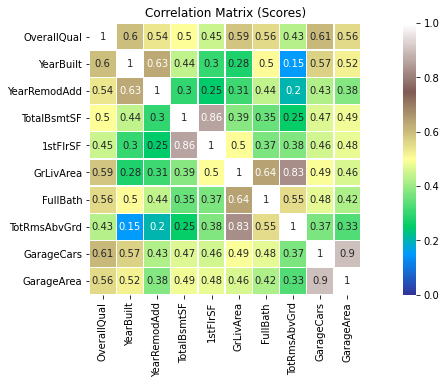

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
corr_ = train[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]].corr()
sns.heatmap(corr_, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='terrain')
plt.title("Correlation Matrix (Scores)")
plt.show()

### 5- Assumption five: error terms should be uncorrelated with one other

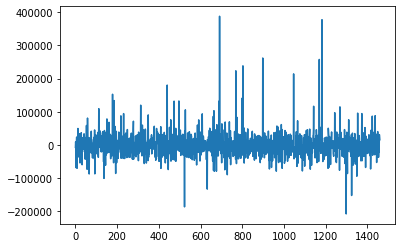

In [34]:
plt.plot(errors)
plt.show()

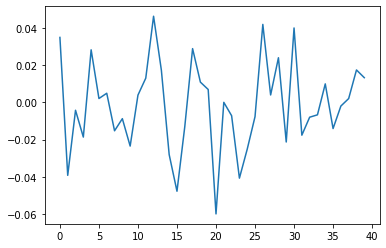

In [35]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

### 6- Assumption six: features shouldn't be correlated with the errors

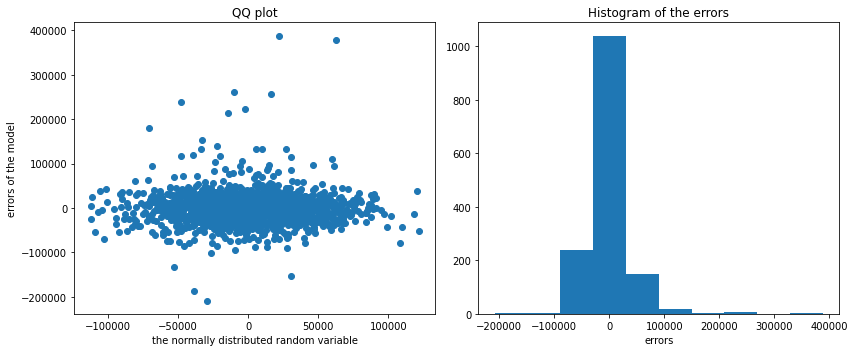

In [36]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [37]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 25972.227055921296 and p value is 0.0
Normality test statistics is 880.6012913918803 and p value is 6.023642597158883e-192
